In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from alp import plot_tools as pt

from alp import exp, models

## Experiments

In [19]:
alp = models.ALP(0.5, 1e7)

### Pythia8 tau events
NUMI_files  = [f"pythia8_events/tau_events_120GeV_HardOff_pT0.0001_{i}.txt" for i in range(0, 8)]+[f"pythia8_events/tau_events_120GeV_HardOff_pT0.0001_v2_{i}.txt" for i in range(0, 8)]
SPS_files   = [f"pythia8_events/tau_events_400GeV_HardOff_pT0.0001_{i}.txt" for i in range(0, 8)]
# LHC_files   = [f"pythia8_events/tau_events_LHC_13.6TeV_v6_{i}.txt" for i in range(0, 8)] 

### Creating the experimental classes 
ICARUS      = exp.Experiment(NUMI_files, exp_dic=exp.ICARUS_exp, alp=alp, duplicate_taus=10)
MICROBOONE  = exp.Experiment(NUMI_files, exp_dic=exp.MicroBooNE_exp, alp=alp, duplicate_taus=10)
NOVA        = exp.Experiment(NUMI_files, exp_dic=exp.NoVA_exp, alp=alp, duplicate_taus=10)
DUNE        = exp.Experiment(NUMI_files, exp_dic=exp.DUNE_exp, alp=alp, duplicate_taus=3)

CHARM = exp.Experiment(SPS_files, exp_dic=exp.CHARM_exp, alp=alp)
BEBC  = exp.Experiment(SPS_files, exp_dic=exp.BEBC_exp, alp=alp)
NA62  = exp.Experiment(SPS_files, exp_dic=exp.NA62_exp, alp=alp)
SHIP  = exp.Experiment(SPS_files, exp_dic=exp.SHiP_exp, alp=alp)

# PROTODUNE_NP02 = exp.Experiment(SPS_files, exp_dic=exp.PROTO_DUNE_NP02_exp, alp=alp)
# PROTODUNE_NP04 = exp.Experiment(SPS_files, exp_dic=exp.PROTO_DUNE_NP04_exp, alp=alp)

# FASER  = exp.Experiment(LHC_files, exp_dic=exp.FASER_exp, alp=alp)
# FASER2 = exp.Experiment(LHC_files, exp_dic=exp.FASER2_exp, alp=alp)

## Check the narrow window around the dimuon threshold

In [26]:
ma_vals= np.append(np.linspace(0.2, 0.22, 50), np.linspace(0.21, 0.212, 20))
rates = []
for ma in ma_vals:
    alp = models.ALP(ma, 4e4, c_lepton=np.diag([1,1,1]))
    rates.append(SHIP.get_event_rate(alp))

In [25]:
rates = np.array(rates)
rates = rates[np.argsort(ma_vals)]
ma_vals = ma_vals[np.argsort(ma_vals)]
fig, ax = pt.std_fig()
alps = models.ALP(ma_vals, 4e4, c_lepton=np.diag([1,1,1]))
ax.plot(1e3*(ma_vals - 2*const.m_mu), rates, color='steelblue')
ax2 = ax.twinx()
ax2.plot(1e3*(ma_vals - 2*const.m_mu), 1e-2*const.get_decay_rate_in_cm(alps.Gamma_a), color="firebrick", linestyle="--")
ax2.set_ylabel(r"$c \tau_a$/m", color="firebrick")
# plt.grid()
ax.set_yscale("log")
ax2.set_yscale("log")
# ax2.set_xscale("log")
ax.set_ylabel("Event rate", color="steelblue")
ax.set_xlabel("$(m_a - 2 m_\mu)$/MeV")
ax.set_title("SHiP event rate ($f_a = 10^{4}$ GeV)", fontsize=11)
ax.vlines(x=0, ymin=0, ymax=1e2, color="black", linestyle=(1,(5,1)), lw=0.5)
ax.set_xlim(-3, 3)
# ax.set_xlim(-10, 10)
fig.savefig("plots/ship_event_rate_around_threshold.pdf", bbox_inches='tight')

NameError: name 'rates' is not defined

# Number of Tau+/Tau- events

In [20]:
# LHC_taus = exp.load_events(LHC_files, as_dataframe=True)
SPS_taus = exp.load_events(SPS_files, as_dataframe=True)
NUMI_taus = exp.load_events(NUMI_files, as_dataframe=True)

In [31]:
NUMI_taus['weights'][NUMI_taus['pid'] == +15]

0         0.0012
2         0.0012
3         0.0536
4         0.0012
5         0.0012
           ...  
263506    0.0536
263507    0.0012
263508    0.0012
263509    0.0012
263512    0.0012
Name: weights, Length: 152552, dtype: float64

In [32]:
print(f"Number of events in NUMI: {sum(NUMI_taus['weights'][NUMI_taus['pid'] == -15]) / sum(NUMI_taus['weights'][NUMI_taus['pid'] == +15]):.2g}")
print(f"Number of events in SPS: {sum(SPS_taus['weights'][SPS_taus['pid'] == -15]) / sum(SPS_taus['weights'][SPS_taus['pid'] == +15]):.2g}")
# print(f"Number of events in LHC: {sum(LHC_taus['pid'] == -15) / sum(LHC_taus['pid'] == +15):.2g}")

Number of events in NUMI: 0.74
Number of events in SPS: 0.84


(-1.0, 1.0)

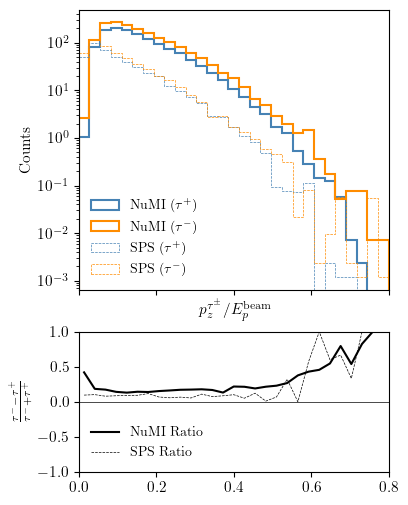

In [39]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(4, 6), gridspec_kw={'height_ratios': [2, 1]}, sharex=True)

bins = np.linspace(0, 0.8, 30)
_=ax.hist(NUMI_taus['pz'][NUMI_taus['pid'] == -15]/120, bins=bins, weights=NUMI_taus['weights'][NUMI_taus['pid'] == -15], histtype='step', label=r"NuMI ($\tau^+$)", color="steelblue", lw=1.5)
_=ax.hist(NUMI_taus['pz'][NUMI_taus['pid'] == +15]/120, bins=bins, weights=NUMI_taus['weights'][NUMI_taus['pid'] == +15], histtype='step', label=r"NuMI ($\tau^-$)", color="darkorange", lw=1.5)

_=ax.hist(SPS_taus['pz'][SPS_taus['pid'] == -15]/400, bins=bins, weights=SPS_taus['weights'][SPS_taus['pid'] == -15], histtype='step', label=r"SPS ($\tau^+$)", color="steelblue", lw=0.5, linestyle="--")
_=ax.hist(SPS_taus['pz'][SPS_taus['pid'] == +15]/400, bins=bins, weights=SPS_taus['weights'][SPS_taus['pid'] == +15], histtype='step', label=r"SPS ($\tau^-$)", color="darkorange", lw=0.5, linestyle="--")

# Create a second axis for the ratio

numi_ratio = (np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == +15]/120, bins=bins)[0] - np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == -15]/120, bins=bins)[0])/(np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == +15]/120, bins=bins)[0] + np.histogram(NUMI_taus['pz'][NUMI_taus['pid'] == -15]/120, bins=bins)[0])
sps_ratio = (np.histogram(SPS_taus['pz'][SPS_taus['pid'] == +15]/400, bins=bins)[0] - np.histogram(SPS_taus['pz'][SPS_taus['pid'] == -15]/400, bins=bins)[0])/(np.histogram(SPS_taus['pz'][SPS_taus['pid'] == +15]/400, bins=bins)[0] + np.histogram(SPS_taus['pz'][SPS_taus['pid'] == -15]/400, bins=bins)[0])

bin_centers = (bins[:-1] + bins[1:]) / 2
ax2.plot(bin_centers, numi_ratio, label=r"NuMI Ratio", color="black", lw=1.5)
ax2.plot(bin_centers, sps_ratio, label=r"SPS Ratio", color="black", lw=0.5, linestyle="--")
ax2.set_ylabel(r"$\frac{{\tau^-} - {\tau^+}}{{\tau^-} + {\tau^+}}$")
ax2.legend(loc="lower left")
ax2.hlines(y=0, xmin=0, xmax=1, color="black", lw=0.5)
ax.legend()
ax.set_yscale("log")
ax.set_xlabel(r"${p_z^{\tau^\pm}}/{E_p^{\rm beam}}$")
ax.set_ylabel("Counts")
ax.set_xlim(0, bins.max())
ax2.set_ylim(-1, 1)

In [40]:
alp_1 = models.ALP(0.5, 1e7, c_lepton=np.diag([1,1,1]))
# SHIP  = exp.Experiment(SPS_files, exp_dic=exp.SHiP_exp, alp=alp_1)
alp_2 = models.ALP(0.1, 1e4, c_lepton=np.diag([1,1,1]))
# SHIP.reweight(alp_1, alp_2)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


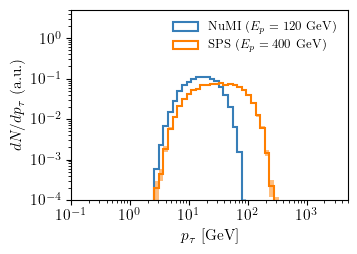

In [42]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
b = np.geomspace(0.1, 5e3, 61)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

# p4, w = FASER.p4_taus, FASER.tau_weights
# pt.plot_hist_with_errors(ax, np.sqrt(p4[:,0]**2 - const.m_tau**2)*xunits, w, b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$p_{\tau}$ [GeV]')
ax.set_ylabel(r'$dN/d p_{\tau}$ (a.u.)')
ax.set_xlim(b.min(),b.max())
ax.set_ylim(1e-4, 5)
# ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_energy_spectrum.pdf', bbox_inches='tight')

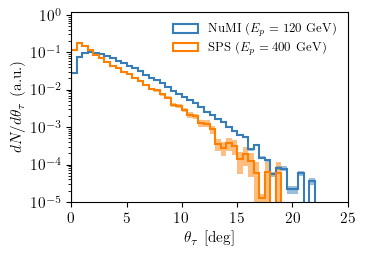

In [43]:
fig,ax = pt.std_fig(figsize=(3.5,2.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 25, 51)

p4, w = ICARUS.p4_taus, ICARUS.tau_weights
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(p4)*xunits, w, b, r'NuMI ($E_p = 120$~GeV)', pt.CB_color_cycle[0], nevents=ICARUS.nevents)

p4, w = SHIP.p4_taus, SHIP.tau_weights
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(p4)*xunits, w, b, r'SPS ($E_p = 400$~GeV)', pt.CB_color_cycle[1], nevents=SHIP.nevents)

# p4, w = FASER.p4_taus, FASER.tau_weights
# pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(p4)*xunits, w, b, r'FASER ($\sqrt{s} = 13.6$~TeV)', pt.CB_color_cycle[2], nevents=FASER.nevents)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{\tau}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_\tau$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-5, 1, 6))
ax.legend(loc='upper right', fontsize=9, ncol=1)
fig.savefig('plots/tau_angular_spectrum.pdf', bbox_inches='tight')

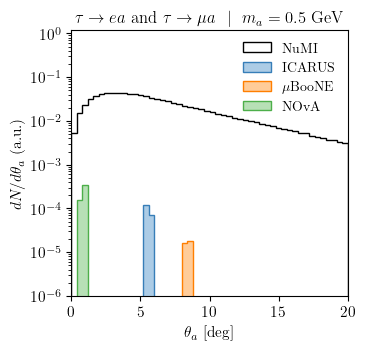

In [44]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 20, 51)

p4, w, channels = ICARUS.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='NuMI', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='ICARUS', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'$\mu$BooNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)

p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'NOvA', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.2)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/NuMI_alp_angular_spectrum.pdf', bbox_inches='tight')

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


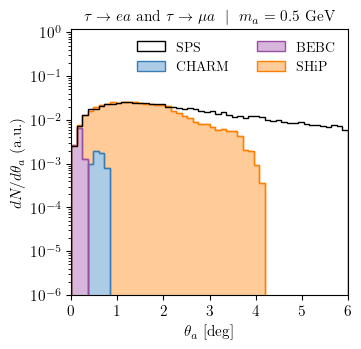

In [47]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e8)
xunits = 180 / np.pi
b = np.linspace(0, 6, 51)

p4, w, channel = CHARM.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='SPS', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='CHARM', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='BEBC', histtype='stepfilled', edgecolor=pt.CB_color_cycle[5], facecolor=pt.lighten_color(pt.CB_color_cycle[5], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[5], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'SHiP', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

# p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
# ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'ProtoDUNE', histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.4), linestyle='-', density=False, zorder=1.4)
# ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-6, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=2)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_angular_spectrum.pdf', bbox_inches='tight')

NameError: name 'FASER2' is not defined

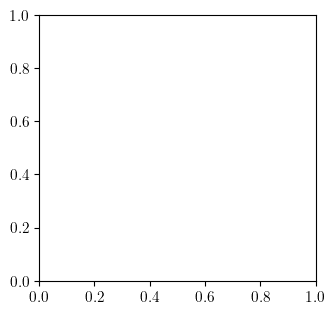

In [15]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 180 / np.pi
b = np.linspace(0, 1, 51)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = np.sum(w)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='stepfilled', edgecolor='black', facecolor='None', linestyle='-', density=False, zorder=1.9)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label='FASER', histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.4), linestyle='-', density=False, zorder=1.3)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights =w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], facecolor='None', linestyle='-', density=False, zorder=1.8)

p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, label=r'FASER2', histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.4), linestyle='-', density=False, zorder=1.2)
ax.hist(Cfv.get_theta_3vec(p4)*xunits, bins=b, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], facecolor='None', linestyle='-', density=False, zorder=1.8)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1e-1)
# ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=10, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=12)
fig.savefig('plots/LHC_alp_angular_spectrum.pdf', bbox_inches='tight')

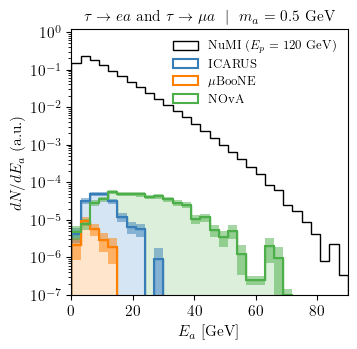

In [48]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(m_a=0.5, f_a=1e5)
xunits = 1
BINS = np.linspace(0, 90, 31)

p4_alp, w, channels = ICARUS.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label='NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ICARUS', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, '$\mu$BooNE', pt.CB_color_cycle[1], nevents=MICROBOONE.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'NOvA', pt.CB_color_cycle[2], nevents=NOVA.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.0)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFV.pdf', bbox_inches='tight')

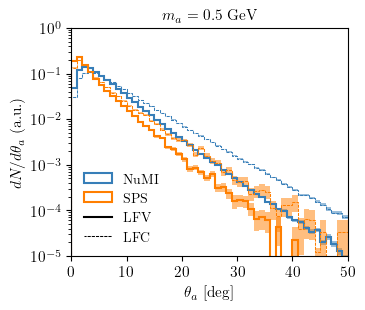

In [52]:
fig,ax = pt.std_fig(figsize=(3.5,3))

xunits = 180 / np.pi
b = np.linspace(0, 50, 51)
mALP = 0.5
alp = models.ALP(mALP, 1e5, c_lepton=np.diag([1,1,1]))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
# FASER.get_alp_events(alp=alp)

pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, 'NuMI', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, 'SPS', pt.CB_color_cycle[1], nevents=CHARM.nevents)
# pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, 'LHC $13.6$~TeV', 'grey', nevents=FASER.nevents)

alp = models.ALP(mALP, 1e5, c_lepton=np.ones((3,3)))
ICARUS.get_alp_events(alp=alp)
CHARM.get_alp_events(alp=alp)
# FASER.get_alp_events(alp=alp)

pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(ICARUS.p4_alp)*xunits, ICARUS.weights/np.sum(ICARUS.weights), b, None, pt.CB_color_cycle[0], nevents=ICARUS.nevents, ls=(1,(3,1)), lw=0.75)
pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(CHARM.p4_alp)*xunits, CHARM.weights/np.sum(CHARM.weights), b, None, pt.CB_color_cycle[1], nevents=CHARM.nevents, ls=(1,(3,1)), lw=0.75)
# pt.plot_hist_with_errors(ax, Cfv.get_theta_3vec(FASER.p4_alp)*xunits, FASER.weights/np.sum(FASER.weights), b, None, 'grey', nevents=FASER.nevents, ls=(1,(3,1)), lw=0.75)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$dN/d \theta_a$ (a.u.)')
ax.set_xlim(0,b.max())
ax.set_ylim(1e-5, 1)

ax.set_yticks(np.geomspace(1e-5, 1, 6))
# l1 = ax.legend(loc='upper right', fontsize=10, ncol=1)

l = []
# l.append(ax.plot([],[], ls='-', color=pt.CB_color_cycle[0], lw=0, label='\,\,')[0])
l.append(ax.plot([],[], ls='-', color='black', lw=1.5, label='LFV')[0])
l.append(ax.plot([],[], ls=(1,(3,1)), color='black', lw=0.75, label='LFC')[0])
# ax.add_artist(l1)
ax.legend(loc='lower left', fontsize=10, ncol=1)
ax.set_title(fr'$m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/All_alp_angular_spectrum_LFC.pdf', bbox_inches='tight')

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


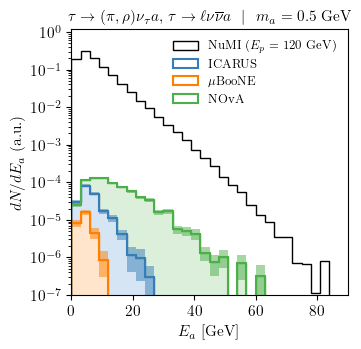

In [57]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(m_a=0.5, f_a=1e5, c_lepton=np.diag([1,1,1]))

xunits = 1
BINS = np.linspace(0, 90, 31)

p4_alp, w, channels = NOVA.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4_alp[:,0], bins=BINS, weights=w/WNORM, label=r'NuMI ($E_p = 120$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False)

p4, w, channels = ICARUS.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ICARUS', pt.CB_color_cycle[0], nevents=ICARUS.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)


p4, w, channels = MICROBOONE.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, '$\mu$BooNE', pt.CB_color_cycle[1], nevents=MICROBOONE.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = NOVA.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'NOvA', pt.CB_color_cycle[2], nevents=NOVA.nevents)
ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.0)
# ax.hist(p4[:,0], bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-7, 1.2)
ax.set_yticks(np.geomspace(1e-7, 1, 8))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to (\pi,\rho)\nu_\tau a$, $\tau \to \ell \nu \overline\nu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/NuMI_alp_spectrum_LFC.pdf', bbox_inches='tight')

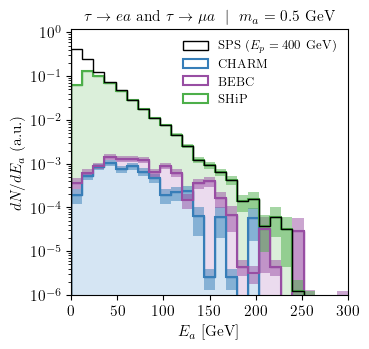

In [59]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1
BINS = np.linspace(0, 300, 26)

p4, w, channels = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'SPS ($E_p = 400$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False,zorder=3)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'CHARM', pt.CB_color_cycle[0], nevents=CHARM.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.4)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w, channels = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'BEBC', pt.CB_color_cycle[5], nevents=BEBC.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[5], facecolor=pt.lighten_color(pt.CB_color_cycle[5], 0.2), linestyle='-', density=False, zorder=1.3)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

# p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
# pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ProtoDUNE', pt.CB_color_cycle[1], nevents=PROTODUNE_NP02.nevents)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)

p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
pt.plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'SHiP', pt.CB_color_cycle[2], nevents=SHIP.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.1)
# ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFV.pdf', bbox_inches='tight')

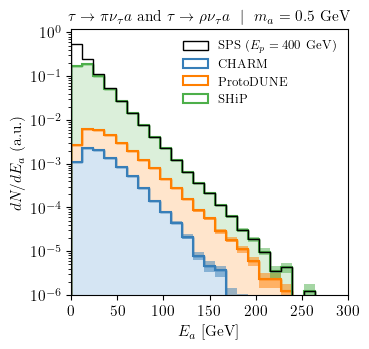

In [127]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1
BINS = np.linspace(0, 300, 26)


p4, w, channels = SHIP.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'SPS ($E_p = 400$~GeV)', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'CHARM', pt.CB_color_cycle[0], nevents=CHARM.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=1.3)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[0], linestyle='-', density=False, zorder=1.9)

p4, w, channels = PROTODUNE_NP02.get_alps_in_acceptance(generate_events=True, alp=alp)
plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'ProtoDUNE', pt.CB_color_cycle[1], nevents=PROTODUNE_NP02.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1.2)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[1], linestyle='-', density=False, zorder=1.9)


p4, w, channels = SHIP.get_alps_in_acceptance(generate_events=False, alp=alp)
plot_hist_with_errors(ax, p4[:,0], w/WNORM, BINS, 'SHiP', pt.CB_color_cycle[2], nevents=SHIP.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[2], facecolor=pt.lighten_color(pt.CB_color_cycle[2], 0.2), linestyle='-', density=False, zorder=1.1)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='step', edgecolor=pt.CB_color_cycle[2], linestyle='-', density=False, zorder=1.9)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [GeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(1e-5, 1.2)
ax.set_yticks(np.geomspace(1e-6, 1, 7))
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/SPS_alp_spectrum_LFC.pdf', bbox_inches='tight')

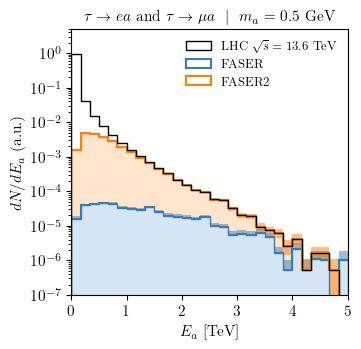

In [139]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e5)
xunits = 1e-3
BINS = np.linspace(0, 5, 31)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER', pt.CB_color_cycle[0], nevents=FASER.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=2)

p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER2', pt.CB_color_cycle[1], nevents=FASER2.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [TeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 5)
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to e a$ and $\tau \to \mu a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFV.pdf', bbox_inches='tight')

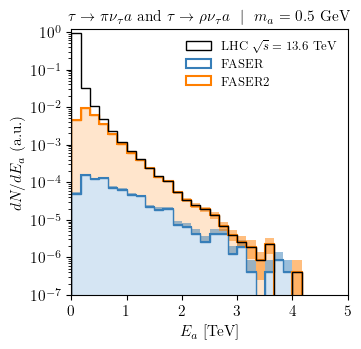

In [138]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))

alp = models.ALP(0.5, 1e2, c_lepton=np.diag([1,1,1]))
xunits = 1e-3
BINS = np.linspace(0, 5, 31)

p4, w, channels = FASER2.get_alp_events(alp=alp)
WNORM = w.sum()
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, label=r'LHC $\sqrt{s} = 13.6$~TeV', histtype='step', edgecolor='black', facecolor='None',  linestyle='-', density=False, zorder=3)

p4, w, channels = FASER.get_alps_in_acceptance(generate_events=True, alp=alp)
plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER', pt.CB_color_cycle[0], nevents=FASER.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[0], facecolor=pt.lighten_color(pt.CB_color_cycle[0], 0.2), linestyle='-', density=False, zorder=2)


p4, w, channels = FASER2.get_alps_in_acceptance(generate_events=False, alp=alp)
plot_hist_with_errors(ax, p4[:,0]*xunits, w/WNORM, BINS, 'FASER2', pt.CB_color_cycle[1], nevents=FASER2.nevents)
ax.hist(p4[:,0]*xunits, bins=BINS, weights=w/WNORM, histtype='stepfilled', edgecolor=pt.CB_color_cycle[1], facecolor=pt.lighten_color(pt.CB_color_cycle[1], 0.2), linestyle='-', density=False, zorder=1)


ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlabel(r'$E_{a}$ [TeV]')
ax.set_ylabel(r'$dN/d E_a$ (a.u.)')
ax.set_xlim(0,BINS.max())
ax.set_ylim(0.1e-6, 1.2)
ax.legend(loc='upper right', fontsize=9, ncol=1)
ax.set_title(fr'$\tau \to \pi\nu_\tau a$ and $\tau \to \rho \nu_\tau a$ $\,\,\vert\,\,$ $m_a = {alp.m_a}$ GeV', fontsize=11)
fig.savefig('plots/LHC_alp_spectrum_LFC.pdf', bbox_inches='tight')

In [174]:
CHARM.weights[CHARM.mask_alp_in_acc].sum()/BEBC.weights[BEBC.mask_alp_in_acc].sum()

np.float64(0.5391720067859684)

Text(0, 0.5, '$E_{a}$ [GeV]')

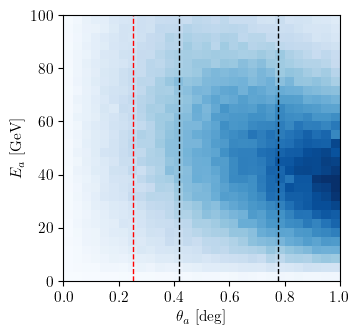

In [158]:
fig,ax = pt.std_fig(figsize=(3.5,3.5))
bin_theta = np.linspace(0, 1, 31)
bin_E = np.linspace(0, 100, 31)
angle_units = 180 / np.pi


p4, w, channels = CHARM.get_alp_events(alp=alp)
_=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=-np.log10(w/np.sum(w)), cmap='Blues', linestyle='-', density=False, zorder=1.3)

# p4, w, channels = BEBC.get_alps_in_acceptance(generate_events=True, alp=alp)
# _=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=w/np.sum(w), cmap='Blues', linestyle='-', density=False, zorder=1.3)

# p4, w, channels = CHARM.get_alps_in_acceptance(generate_events=True, alp=alp)
# _=ax.hist2d(Cfv.get_theta_3vec(p4)*angle_units, p4[:,0]*xunits, bins=(bin_theta,bin_E), weights=w/np.sum(w), cmap='Blues', linestyle='-', density=False, zorder=1.3)

ax.vlines([angle_units*np.arctan((exp.CHARM_exp['dX']/2 + exp.CHARM_exp['x0'])/exp.CHARM_exp['L']),
           angle_units*np.arctan((exp.CHARM_exp['x0']- exp.CHARM_exp['dX']/2)/exp.CHARM_exp['L'])
           ], 0, 100, color='black', lw=1, ls='--')

ax.vlines([angle_units*np.arctan((exp.BEBC_exp['dX']/2 + exp.BEBC_exp['x0'])/exp.BEBC_exp['L']),
           angle_units*np.arctan((exp.BEBC_exp['x0']- exp.BEBC_exp['dX']/2)/exp.BEBC_exp['L'])
           ], 0, 100, color='red', lw=1, ls='--')

ax.set_xlabel(r'$\theta_{a}$ [deg]')
ax.set_ylabel(r'$E_{a}$ [GeV]')

## Acceptance vs ALP mass

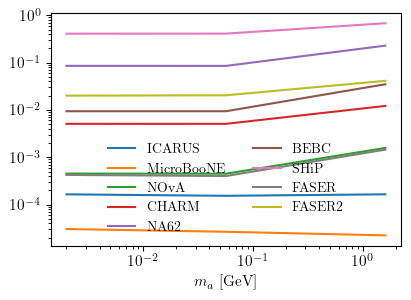

In [288]:
fig, ax = pt.std_fig()

malps = np.geomspace(2e-3, 1.6, 3)

for experiment in [ICARUS, MICROBOONE, NOVA, CHARM, NA62, BEBC, SHIP, FASER, FASER2]:
    effs = []
    for m in malps:
        _ = experiment.get_event_rate(alp=models.ALP(m, 1e5))
        effs.append(experiment.eff)

    ax.plot(malps, effs, label=experiment.name)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol=2)
ax.set_xlabel(r'$m_{a}$ [GeV]')
fig.savefig('plots/acceptance_versus_alp_mass.pdf', bbox_inches='tight', dpi=300)